# 서울특별시 공공자전거 따릉이 대여이력 분석
* [miningful/seoulbike: 따릉이 따세권EDA](https://github.com/miningful/seoulbike)에서 흥미를 얻어 분석을 시작하게 됨

## 데이터 출처 :
* 서울특별시 공공자전거 대여이력 정보
http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-15182&srvType=F&serviceKind=1&currentPageNo=1

* `(이달의주요공개정보)_서울_공공자전거(따릉이)_이용현황 자료(161021).xlsx (1.24MB)`
https://opengov.seoul.go.kr/anspruch/10045476


## 관련자료 
* [(석간) 서울시 따릉이 회원 62만 돌파 출 퇴근시간 38% 집중](http://spp.seoul.go.kr/main/news/news_report.jsp#view/253821)
* [공공자전거 따릉이 인기 따라 '따세권' 형성…소외지역도 :: 공감언론 뉴시스통신사 ::](http://www.newsis.com/view/?id=NISX20180706_0000356247&cID=10201&pID=10200)
* [서울특별시 빅데이터 캠퍼스 > 분석결과/사례공유 > 서울시 분석사례 > 서울시 자전거 이동경로 분석](https://bigdata.seoul.go.kr/noti/selectNoti.do?r_id=P430&bbs_seq=229&sch_type=&sch_text=&currentPage=1)

## 사용할 도구 가져오기

In [1]:
import pandas as pd
import csv
from plotnine import *


# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## 데이터 불러오기

In [2]:
%ls data/seoul_bike/

서울_공공자전거_따릉이_이용현황자료_20161026.xlsx
서울특별시 공공자전거 대여이력 정보_2015년.csv
서울특별시 공공자전거 대여이력 정보_2016년_1.csv
서울특별시 공공자전거 대여이력 정보_2016년_2.csv
서울특별시 공공자전거 대여이력 정보_2016년_3.csv
서울특별시 공공자전거 대여이력 정보_2017년_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_3분기_2.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_1.csv
서울특별시 공공자전거 대여이력 정보_2017년_4분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_1분기1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_1.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_2.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_3.csv
서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv


In [3]:
df = pd.read_csv('data/seoul_bike/서울특별시 공공자전거 대여이력 정보_2018년_2분기_4.csv', encoding='cp949')
df.shape

(586304, 11)

## 데이터 미리보기 및 요약하기

In [4]:
df.head()

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-11906','2018-06-16 00:00:07','932',' 예일여중',1,'2018-06-16 00:16:41','934',' 신사동 성당',11,15,2160
1,'SPB-16954','2018-06-16 00:00:07','272',' 당산육갑문',16,'2018-06-16 02:00:36','1827',' 독산보도육교 앞 자전거 보관소',9,120,18100
2,'SPB-09676','2018-06-16 00:00:11','1036',' 고덕동 주양쇼핑',7,'2018-06-16 00:24:05','1038',' 강일 다솜 어린이 공원',9,23,3350
3,'SPB-07143','2018-06-16 00:00:15','1726',' 삼익세라믹아파트교차로',7,'2018-06-16 00:15:31','1706',' 기업은행 앞',9,14,1480
4,'SPB-13007','2018-06-16 00:00:16','2058',' 노량진동 맥도널드앞',10,'2018-06-16 00:14:25','258',' 신길역3번출구',8,13,2920


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
'자전거번호'      586304 non-null object
'대여일시'       586304 non-null object
'대여대여소번호'    586304 non-null object
'대여대여소명'     586304 non-null object
'대여거치대'      586304 non-null int64
'반납일시'       586304 non-null object
'반납대여소번호'    586304 non-null object
'반납대여소명'     586304 non-null object
'반납거치대'      586304 non-null int64
'이용시간(분)'    586304 non-null int64
'이용거리(M)'    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


## 분석을 위한 전처리

In [6]:
df.columns = df.columns.str.strip("'")

In [7]:
df['반납일시'].dtypes

dtype('O')

In [8]:
# 불필요하게 '가 들어가 있다. 스트링 타입으로 되어있는 데이터에서 '을 제거하자.
df.iloc[:, :4] = df.iloc[:, :4].apply(lambda x: x.str.strip("'"))
df.iloc[:, 5:8] = df.iloc[:, 5:8].apply(lambda x: x.str.strip("'"))

In [9]:
df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
0,SPB-11906,2018-06-16 00:00:07,932,예일여중,1,2018-06-16 00:16:41,934,신사동 성당,11,15,2160
1,SPB-16954,2018-06-16 00:00:07,272,당산육갑문,16,2018-06-16 02:00:36,1827,독산보도육교 앞 자전거 보관소,9,120,18100
2,SPB-09676,2018-06-16 00:00:11,1036,고덕동 주양쇼핑,7,2018-06-16 00:24:05,1038,강일 다솜 어린이 공원,9,23,3350
3,SPB-07143,2018-06-16 00:00:15,1726,삼익세라믹아파트교차로,7,2018-06-16 00:15:31,1706,기업은행 앞,9,14,1480
4,SPB-13007,2018-06-16 00:00:16,2058,노량진동 맥도널드앞,10,2018-06-16 00:14:25,258,신길역3번출구,8,13,2920


In [10]:
df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),이용거리(M)
586299,SPB-15985,2018-06-30 23:59:55,505,자양사거리 광진아크로텔 앞,9,2018-07-01 00:09:38,593,자양중앙나들목,5,9,1230
586300,SPB-15081,2018-06-30 23:59:55,1328,월곡역 3번출구,7,2018-07-01 00:18:02,647,신이문역 1번출구,7,17,3600
586301,SPB-13677,2018-06-30 23:59:57,2376,수서역 6번출구 앞,2,2018-07-01 00:20:38,2387,래미안강남힐즈 사거리,5,20,2590
586302,SPB-06577,2018-06-30 23:59:57,1251,석촌역 2번출구,2,2018-07-01 00:57:29,1245,문정 법조단지9,4,57,6640
586303,SPB-03842,2018-06-30 23:59:58,2169,봉천역 2번출구,6,2018-07-01 00:08:05,2112,서울대입구역 마에스트로,7,7,910


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586304 entries, 0 to 586303
Data columns (total 11 columns):
자전거번호      586304 non-null object
대여일시       586304 non-null object
대여대여소번호    586304 non-null object
대여대여소명     586304 non-null object
대여거치대      586304 non-null int64
반납일시       586304 non-null object
반납대여소번호    586304 non-null object
반납대여소명     586304 non-null object
반납거치대      586304 non-null int64
이용시간(분)    586304 non-null int64
이용거리(M)    586304 non-null int64
dtypes: int64(4), object(7)
memory usage: 49.2+ MB


## 결측치 보기

In [12]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간(분)    0
이용거리(M)    0
dtype: int64

## 결측치 시각화 하기

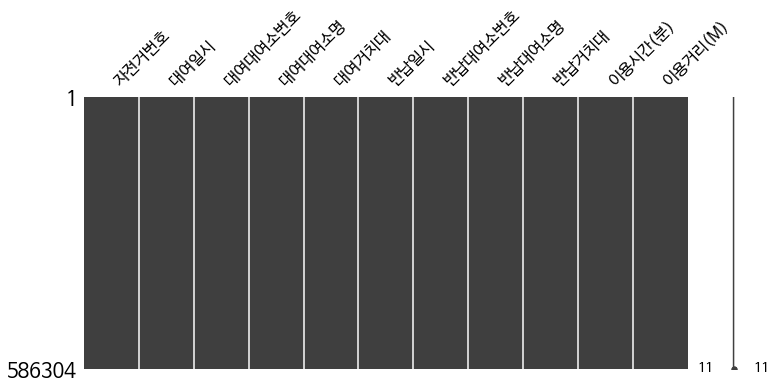

In [13]:
# 결측치 보기
import missingno as msno

msno.matrix(df, figsize=(12,5))

## 대여소별 대여|반납 현황

In [14]:
print('# 대여소 수')
print('대여 대여소: ', df['대여대여소번호'].unique().shape[0])
print('반납 대여소: ', df['반납대여소번호'].unique().shape[0])

# 대여소 수
대여 대여소:  1267
반납 대여소:  1269


In [15]:
df['대여대여소번호'].value_counts().tail(10)

2343        39
1101        38
2288        29
741         27
2275        26
1040        25
2287        21
2286        16
상암센터 정비실     8
554          5
Name: 대여대여소번호, dtype: int64

* 대여 대여소번호에 상암센터 정비실과 위트콤 같은 숫자가 아닌 곳들이 있음

In [16]:
# 대여량이 많은 상위 대여소
df['대여대여소명'].value_counts().head(10)

 여의나루역 1번출구 앞               4073
 뚝섬유원지역 1번출구 앞              3369
 홍대입구역 2번출구 앞               3174
 봉림교 교통섬                    2709
 롯데월드타워(잠실역2번출구 쪽)          2637
 고속터미널역 8-1번, 8-2번 출구 사이    2453
 마포구민체육센터 앞                 2178
 신도림역 1번 출구 앞               2022
 안암로터리 버스정류장 앞              1987
 잠실새내역 5번 출구 뒤              1841
Name: 대여대여소명, dtype: int64

In [17]:
# 반납량이 많은 상위 대여소
df['반납대여소명'].value_counts().head(10)

 홍대입구역 2번출구 앞               3896
 뚝섬유원지역 1번출구 앞              3814
 여의나루역 1번출구 앞               3730
 봉림교 교통섬                    2762
 롯데월드타워(잠실역2번출구 쪽)          2624
 고속터미널역 8-1번, 8-2번 출구 사이    2495
 마포구민체육센터 앞                 2454
 안암로터리 버스정류장 앞              2110
 신도림역 1번 출구 앞               1961
 CJ 드림시티                    1932
Name: 반납대여소명, dtype: int64

1. 대여반납이 많은 상위 대여소인 홍대입구역, 여의나루역, 뚝섬유원지, 롯데월드타워는 모두 강이나 호수를 인근에 두고 있다. 
2. 성대입구나 안암로터리 버스정류장은 대학가 인근이다.

In [18]:
# 평균 이용거리가 긴 상위 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=False).head(10)

,대여대여소명,이용거리(M)
353,동작역 5번출구 동작주차공원,10454.240000
330,독산보도육교 앞 자전거 보관소,10401.840607
810,신한은행 시흥대로금융센터지점,9857.738095
280,달맞이공원,9639.504950
1166,한내근린공원 남측,9419.090909
1197,현대자동차서비스 앞,9364.282178
419,망원초록길 입구,9160.294118
1194,현대고등학교 건너편,9047.614350
1231,흑석역 1번출구,8938.909300
1113,청계천 생태교실 앞,8923.918819


In [19]:
# 평균 이용거리가 짧은 대여소
df.groupby(['대여대여소명'])['이용거리(M)'].mean().reset_index().sort_values(by='이용거리(M)', ascending=True).head()

,대여대여소명,이용거리(M)
1249,상암센터 정비실,256.250000
188,국군복지단,1828.244275
7,CJ오쇼핑앞,1832.727273
100,건국대학교 과학관(이과대) 앞,2143.065327
937,원남동사거리,2234.752294


In [20]:
# 평균 이용시간이 많은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=False).head()

,대여대여소명,이용시간(분)
280,달맞이공원,59.782178
353,동작역 5번출구 동작주차공원,59.484000
93,개화동상사마을종점 버스정류장,55.500000
649,서울숲 남문 버스정류소 옆,55.495074
648,서울숲 관리사무소,55.492228


In [21]:
# 평균 이용시간이 적은 상위 대여소
df.groupby(['대여대여소명'])['이용시간(분)'].mean().reset_index().sort_values(by='이용시간(분)', ascending=True).head()

,대여대여소명,이용시간(분)
7,CJ오쇼핑앞,11.416667
1249,상암센터 정비실,12.000000
188,국군복지단,12.022901
1089,참새공원(백곡경노당),12.666667
575,삼일초등학교 인근,14.460274


## 시계열 데이터 보기

In [22]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df.dtypes

자전거번호              object
대여일시       datetime64[ns]
대여대여소번호            object
대여대여소명             object
대여거치대               int64
반납일시       datetime64[ns]
반납대여소번호            object
반납대여소명             object
반납거치대               int64
이용시간(분)             int64
이용거리(M)             int64
dtype: object

In [23]:
df['대여년'] = df['대여일시'].dt.year
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여시'] = df['대여일시'].dt.hour
df['대여분'] = df['대여일시'].dt.minute
df['대여요일'] = df['대여일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일'],
      dtype='object')

In [24]:
df['반납년'] = df['반납일시'].dt.year
df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납시'] = df['반납일시'].dt.hour
df['반납분'] = df['반납일시'].dt.minute
df['반납요일'] = df['반납일시'].dt.dayofweek
df.columns

Index(['자전거번호', '대여일시', '대여대여소번호', '대여대여소명', '대여거치대', '반납일시', '반납대여소번호',
       '반납대여소명', '반납거치대', '이용시간(분)', '이용거리(M)', '대여년', '대여월', '대여일', '대여시',
       '대여분', '대여요일', '반납년', '반납월', '반납일', '반납시', '반납분', '반납요일'],
      dtype='object')

## 일자별 대여|반납 현황

In [25]:
df_day_1 = df['대여일'].value_counts().reset_index()
df_day_1.columns = ['day', 'count']

df_day_1 = df_day_1.sort_values('day')
df_day_1['대여반납'] = '대여'
print(df_day_1.shape)

df_day_2 = df['반납일'].value_counts().reset_index()
df_day_2.columns = ['day', 'count']
df_day_2 = df_day_2.sort_values('day')
df_day_2['대여반납'] = '반납'
print(df_day_2.shape)

df_day = pd.concat([df_day_1, df_day_2])
print(df_day.shape)
df_day

(15, 3)
(18, 3)
(33, 3)


,day,count,대여반납
5,16,46038,대여
7,17,43161,대여
11,18,35828,대여
2,19,46839,대여
3,20,46107,대여
0,21,47319,대여
1,22,47024,대여
6,23,45274,대여
10,24,39164,대여
4,25,46105,대여


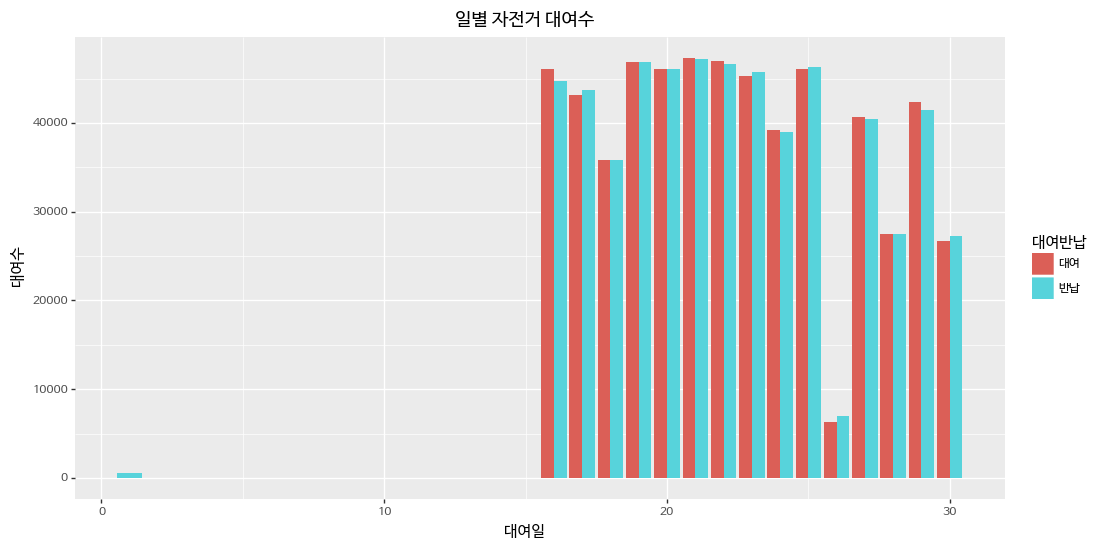

<ggplot: (297810766)>

In [26]:
(ggplot(df_day)
 + aes(x='day', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + labs(x='대여일', y='대여수', title='일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

* 일부 날짜의 데이터만 있다.
* 26일에는 대여와 반납모두 적다.
* 26일의 일기예보를 보면 장맛비가 내린것을 확인해 볼 수 있다. https://www.youtube.com/watch?v=cYHC8iwfFyU

## 요일별 대여|반납 현황

In [27]:
df_dow_1 = df['대여요일'].value_counts().reset_index()
df_dow_1.columns = ['dayofweek', 'count']
df_dow_1 = df_dow_1.sort_values('dayofweek')
df_dow_1['대여반납'] = '대여'
print(df_dow_1.shape)

df_dow_2 = df['반납요일'].value_counts().reset_index()
df_dow_2.columns = ['dayofweek', 'count']
df_dow_2 = df_dow_2.sort_values('dayofweek')
df_dow_2['대여반납'] = '반납'
print(df_dow_2.shape)

df_dow = pd.concat([df_dow_1, df_dow_2])
print(df_dow.shape)

(7, 3)
(7, 3)
(14, 3)


In [28]:
weekday_map= {0:'MON', 1:'TUE', 2:'WED', 3:'THU',
              4:'FRI', 5:'SAT', 6:'SUN'}

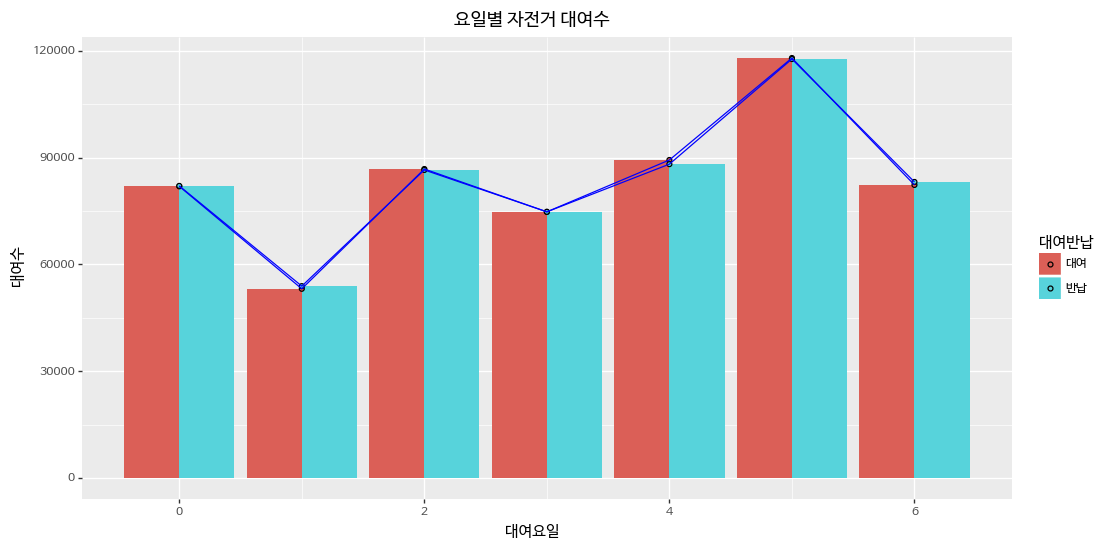

<ggplot: (298435504)>

In [29]:
(ggplot(df_dow)
 + aes(x='dayofweek', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='대여요일', y='대여수', title='요일별 자전거 대여수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

## 시간대별 대여|반납량

In [30]:
df_hour_1 = df['대여시'].value_counts().reset_index()
df_hour_1.columns = ['hour', 'count']
df_hour_1 = df_hour_1.sort_values('hour')
df_hour_1['대여반납'] = '대여'
df_hour_1.head()

df_hour_2 = df['반납시'].value_counts().reset_index()
df_hour_2.columns = ['hour', 'count']
df_hour_2 = df_hour_2.sort_values('hour')
df_hour_2['대여반납'] = '반납'
df_hour_2.head()

df_hour = pd.concat([df_hour_1, df_hour_2])
df_hour.head()

,hour,count,대여반납
13,0,19837,대여
17,1,15358,대여
19,2,12255,대여
21,3,7462,대여
23,4,4392,대여


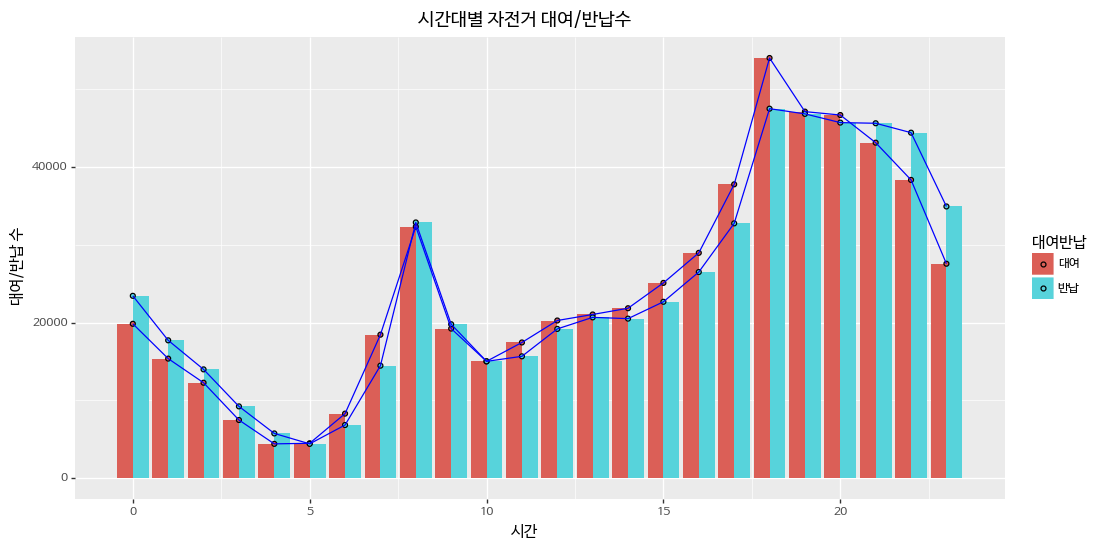

<ggplot: (-9223372036555262043)>

In [31]:
(ggplot(df_hour)
 + aes(x='hour', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='시간', y='대여/반납 수', title='시간대별 자전거 대여/반납수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

* 새벽시간대로 갈 수록 대여/반납 수가 줄어든다.
* 출근시간대에는 대여가 반납보다 많다.
* 오전에는 8시대에 대여/반납이 많으며, 오후시간대에는 18시에 대여/반납이 가장 많다.
* 오전 11시부터 20시까지는 대여가 반납보다 많다.(대여>반납)
* 21시 이후부터 오전 4시까지는 대여보다 반납이 많다.(대여<반납)

In [32]:
df_minute_1 = df['대여분'].value_counts().reset_index()
df_minute_1.columns = ['minute', 'count']
df_minute_1 = df_minute_1.sort_values('minute')
df_minute_1['대여반납'] = '대여'
print(df_minute_1.shape)

df_minute_2 = df['반납분'].value_counts().reset_index()
df_minute_2.columns = ['minute', 'count']
df_minute_2 = df_minute_2.sort_values('minute')
df_minute_2['대여반납'] = '반납'
print(df_minute_2.shape)

df_minute = pd.concat([df_minute_1, df_minute_2])
print(df_minute.shape)

(60, 3)
(60, 3)
(120, 3)


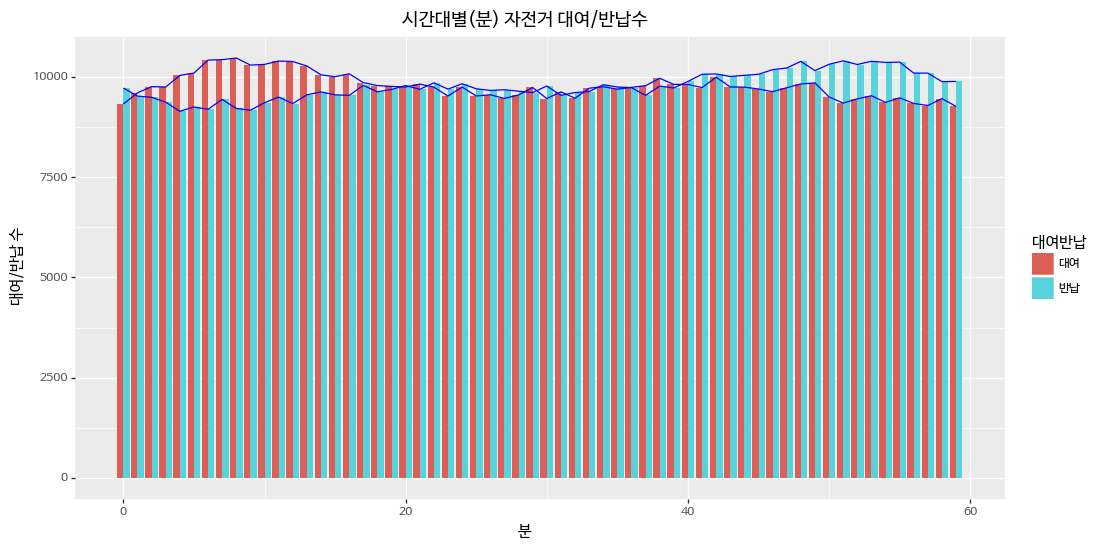

<ggplot: (299521698)>

In [33]:
(ggplot(df_minute)
 + aes(x='minute', y='count', fill='대여반납')
 + geom_bar(stat='identity', position='dodge')
 + geom_line(color='blue')
 + labs(x='분', y='대여/반납 수', title='시간대별(분) 자전거 대여/반납수')
 + theme(text=element_text(family='NanumBarunGothic'),
        figure_size=(12,6))
)

* 대여/반납이 거의 비슷하게 이루어지고 있지만 대여는 0~20분 사이에 더 많이 일어나며 반납은 40~60분 사이에 더 많이 일어난다.

## 대여와 반납은 같은 곳에서 이루어지고 있을까?

In [34]:
df['같은대여반납소'] = df['대여대여소명'] == df['반납대여소명']

In [35]:
df_location_diff = df['같은대여반납소'].value_counts().reset_index()
df_location_diff.columns = ['일치여부', '대여반납수']
location_diff_ratio = df_location_diff['대여반납수'][0]/df_location_diff['대여반납수'][1]
print('같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 {0:.2f}배 많다.'.format(location_diff_ratio))
df_location_diff

같은 곳에서 대여반납 하는 것보다 다른 곳에서 대여반납 하는 것이 7.86배 많다.


,일치여부,대여반납수
0,False,520100
1,True,66204


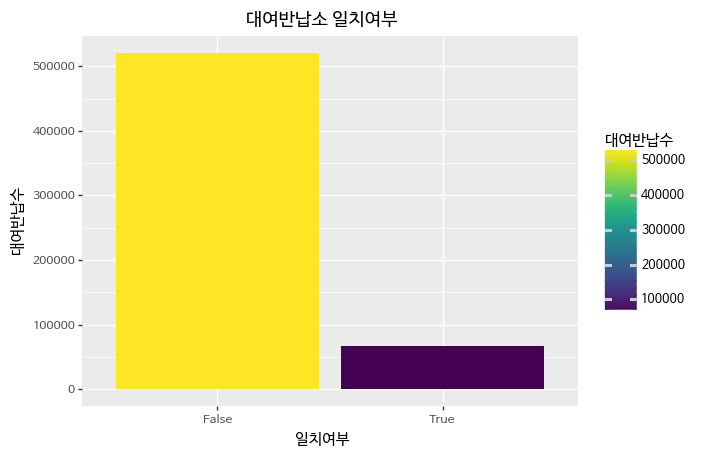

<ggplot: (297810822)>

In [36]:
(ggplot(df_location_diff)
 + geom_col(mapping=aes(x='일치여부', y='대여반납수', fill='대여반납수'))
 + labs(title='대여반납소 일치여부')
 + theme(text=element_text(family='NanumBarunGothic'))
)

같은 곳에서 대여반납을 하는 것보다 다른 곳으로의 대여반납이 훨씬 많은 것을 확인할 수 있다.

In [37]:
df_same_loc = df.loc[df['같은대여반납소'] == True]
df_same_loc.head()

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
27,SPB-09000,2018-06-16 00:01:22,2025,흑석역 1번출구,13,2018-06-16 01:10:42,2025,흑석역 1번출구,9,67,...,0,1,5,2018,6,16,1,10,5,True
34,SPB-08794,2018-06-16 00:01:32,2025,흑석역 1번출구,10,2018-06-16 01:10:42,2025,흑석역 1번출구,15,64,...,0,1,5,2018,6,16,1,10,5,True
40,SPB-02178,2018-06-16 00:01:47,1308,안암로터리 버스정류장 앞,3,2018-06-16 01:52:14,1308,안암로터리 버스정류장 앞,4,110,...,0,1,5,2018,6,16,1,52,5,True
42,SPB-06487,2018-06-16 00:01:50,421,마포구청 앞,6,2018-06-16 00:04:24,421,마포구청 앞,7,2,...,0,1,5,2018,6,16,0,4,5,True
47,SPB-09293,2018-06-16 00:01:56,235,신길동 우리은행 옆,5,2018-06-16 00:05:02,235,신길동 우리은행 옆,5,3,...,0,1,5,2018,6,16,0,5,5,True


In [38]:
# 같은 곳에서 대여반납이 이루어지는 상위 대여소(대여|반납 건 수)
df_same_loc['대여대여소명'].value_counts().head(30)

 여의나루역 1번출구 앞               1046
 뚝섬유원지역 1번출구 앞               900
 서울숲 관리사무소                   665
 봉림교 교통섬                     543
 마포구민체육센터 앞                  541
 고속터미널역 8-1번, 8-2번 출구 사이     485
 옥수역 3번출구                    457
 몽촌토성역 1번출구 옆                390
 노들역 1번출구                    372
 당산육갑문                       336
 양천향교역 7번출구앞                 326
 월드컵공원                       321
 CJ 드림시티                     311
 홍대입구역 2번출구 앞                302
 청계천 생태교실 앞                  292
 홍은사거리                       288
 마포구청 앞                      288
 황금내근린공원                     280
 잠실새내역 5번 출구 뒤               279
 흑석역 1번출구                    274
 보문2교                        266
 외국어대 정문 앞                   262
 한신16차아파트 119동 앞             260
 새절역 2번출구                    252
 현대고등학교 건너편                  246
 서울숲역 4번 출구 옆                214
 도림천 신화교                     212
 도봉구청 옆(중랑천변)                211
 독산보도육교 앞 자전거 보관소            210
 안암로터리 버스정류장 앞               204
Name: 대여대여

* 같은 곳에서 대여반납이 이루어지는 대여소들은 한강주변이나 공원 주변에 위치한 것을 확인해 볼 수 있다.

## 같은|다른 대여소에서 대여가 되는 자전거의 평균 이용시간
### 같은 대여반납소

In [39]:
same_loc_mean_time = df_same_loc['이용시간(분)'].mean()
print('같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', same_loc_mean_time)
df_same_mean = df_same_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_same_count = df_same_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_same_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_same_loc2 = df_same_mean.merge(df_same_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_same_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

같은곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  53.18429400036251


,대여대여소명,반납대여소명,이용시간(분),이용횟수
167,구로1동우체국 앞,구로1동우체국 앞,143.500000,2
278,달맞이공원,달맞이공원,122.066667,15
434,명지대학교 학생회관,명지대학교 학생회관,121.285714,7
856,역삼동 sk뷰 501동앞,역삼동 sk뷰 501동앞,114.000000,1
66,강남세브란스교차로 래미안그레이튼 104동 앞,강남세브란스교차로 래미안그레이튼 104동 앞,99.727273,11
131,공항시장역 4번출구,공항시장역 4번출구,95.545455,11
833,양원역 2번출구,양원역 2번출구,94.333333,3
618,서대문구청,서대문구청,92.023810,42
221,금호역 1번출구 앞,금호역 1번출구 앞,91.777778,9
235,낙성대역 1번출구,낙성대역 1번출구,89.562500,16


In [40]:
# 이용횟수가 많은 곳의 평균 이용시간
df_same_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
850,여의나루역 1번출구 앞,여의나루역 1번출구 앞,66.167304,1046
369,뚝섬유원지역 1번출구 앞,뚝섬유원지역 1번출구 앞,56.593333,900
646,서울숲 관리사무소,서울숲 관리사무소,57.178947,665
518,봉림교 교통섬,봉림교 교통섬,58.836096,543
404,마포구민체육센터 앞,마포구민체육센터 앞,57.975970,541
118,"고속터미널역 8-1번, 8-2번 출구 사이","고속터미널역 8-1번, 8-2번 출구 사이",72.138144,485
905,옥수역 3번출구,옥수역 3번출구,55.855580,457
445,몽촌토성역 1번출구 옆,몽촌토성역 1번출구 옆,58.420513,390
253,노들역 1번출구,노들역 1번출구,63.424731,372
287,당산육갑문,당산육갑문,66.157738,336


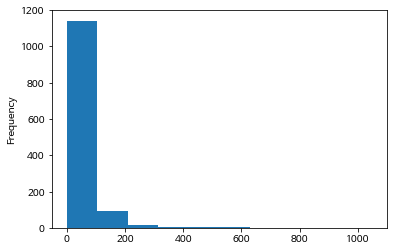

In [41]:
df_same_loc2['이용횟수'].plot.hist()

### 다른 대여|반납소

In [42]:
df_diff_loc = df.loc[df['같은대여반납소'] == False]
df_diff_loc.shape

(520100, 24)

In [43]:
diff_loc_mean_time = df_diff_loc['이용시간(분)'].mean()
print('다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 : ', df_diff_loc['이용시간(분)'].mean())
df_diff_mean = df_diff_loc.groupby(['대여대여소명', '반납대여소명'])['이용시간(분)'].mean().reset_index()
df_diff_count = df_diff_loc.groupby(['대여대여소명', '반납대여소명']).size().reset_index()
df_diff_count.columns = ['대여대여소명', '반납대여소명', '이용횟수']
df_diff_loc2 = df_diff_mean.merge(df_diff_count, left_on=['대여대여소명', '반납대여소명'], right_on=['대여대여소명', '반납대여소명'])
df_diff_loc2.sort_values(by='이용시간(분)', ascending=False).head(10)

다른곳에서 대여, 반납이 이루어지는 자전거의 평균 이용시간 :  25.834228033070563


,대여대여소명,반납대여소명,이용시간(분),이용횟수
94100,천왕역 4번출구 뒤,신정3동 현장민원실 앞,740.000000,1
72879,여의도고교 앞,보라매역 8번출구,651.000000,1
59814,성수역3번출구,논현역 7번출구,553.000000,1
70466,압구정파출소 앞,전농사거리 교통섬,506.000000,1
66230,신설동역8번출구,청계천 박물관 앞,504.000000,3
41979,방화역 4번출구앞,황금내근린공원,479.000000,1
1077,DMC역 2번출구 옆,홍은동 정원여중 입구,440.000000,2
84463,이태원지하보도,마포구청역,437.000000,2
84329,이태원관광특구입구,국립현대미술관,405.666667,3
15423,구로역 광장,유한양행앞,405.000000,1


In [44]:
df_diff_loc2.sort_values(by='이용횟수', ascending=False).head(10)

,대여대여소명,반납대여소명,이용시간(분),이용횟수
99349,하늘채코오롱아파트 건너편,홍대입구역 2번출구 앞,10.240938,469
104360,홍대입구역 2번출구 앞,하늘채코오롱아파트 건너편,14.943734,391
86527,장승배기역 5번출구,노량진역 5번출구,8.200000,285
43695,봉림교 교통섬,도림천 신화교,17.679856,278
26686,도림천 신화교,봉림교 교통섬,14.248175,274
108597,청계산입구역 1번출구,언남초등학교 앞,8.184426,244
43745,봉림교 교통섬,서울신성초등학교,21.479339,242
72270,언남초등학교 앞,청계산입구역 1번출구,6.260504,238
7959,건국대학교 (입학정보관),건국대학교 학생회관,12.218341,229
85076,자양나들목,뚝섬유원지역 1번출구 앞,8.204651,215


In [45]:
rent_mean_time = same_loc_mean_time - diff_loc_mean_time
print('같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 {:,.2f} 분 많다.'.format(rent_mean_time))

같은 곳에서 대여반납이 이루어지는 자전거의 이용시간(분)이 다른 대여소의 대여반납 이용시간보다 27.35 분 많다.


* 이용횟수가 많은 대여소라고 해서 평균이용시간이 평균보다 높지는 않다.
* 하늘채코오롱아파트 건너편<->홍대입구역 2번출구 앞은 이용횟수가 가장 높은 대여반납소다.
* 관련기사
    * ['따릉이' 타고 가장 많이 다닌 경로는? - 통플러스](http://news.tongplus.com/site/data/html_dir/2018/10/24/2018102402585.html)
    * [[ONE SHOT] 따릉이, ‘이곳’서 가장 많이 빌리고 ‘여기’서 가장 많이 탄다](https://news.joins.com/article/23003297)

## 해당 기간동안 가장 많이 이용된 자전거는 몇 회 대여 되었을까?

In [46]:
bike_describe = df['자전거번호'].describe()
print('대여된 자전거 수 :', bike_describe[1])
print('가장 많이 대여된 자전거 번호 :', bike_describe[2])
print('가장 많이 대여된 자전거의 대여횟수 :', bike_describe[3])
bike_describe

대여된 자전거 수 : 12970
가장 많이 대여된 자전거 번호 : SPB-18238
가장 많이 대여된 자전거의 대여횟수 : 139


count        586304
unique        12970
top       SPB-18238
freq            139
Name: 자전거번호, dtype: object

In [47]:
bike_rent_counts = df['자전거번호'].value_counts().reset_index()
bike_rent_counts.columns = ['자전거번호', '대여수']
print('해당 기간동안 자전거 하나당 평균 대여 수:', bike_rent_counts['대여수'].mean())
print('자전거 하나당 가장 많이 대여된 횟수:', bike_rent_counts['대여수'].max())
print('자전거 하나당 가장 적게 대여된 횟수:', bike_rent_counts['대여수'].min())

해당 기간동안 자전거 하나당 평균 대여 수: 45.20462606013878
자전거 하나당 가장 많이 대여된 횟수: 139
자전거 하나당 가장 적게 대여된 횟수: 1


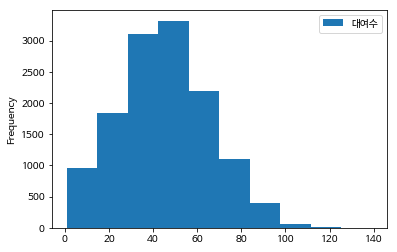

In [48]:
bike_rent_counts.plot.hist()

In [49]:
# 가장 많이 대여된 자전거의 대여이력
df_18238 = df.loc[df['자전거번호'] == 'SPB-18238']
df_18238

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간(분),...,대여시,대여분,대여요일,반납년,반납월,반납일,반납시,반납분,반납요일,같은대여반납소
13282,SPB-18238,2018-06-16 13:01:05,2140,신림1교 교차로,6,2018-06-16 13:46:40,1975,대림역 1번 출입구 밑,4,45,...,13,1,5,2018,6,16,13,46,5,False
14861,SPB-18238,2018-06-16 13:47:21,1975,대림역 1번 출입구 밑,4,2018-06-16 14:17:53,2140,신림1교 교차로,6,30,...,13,47,5,2018,6,16,14,17,5,False
18639,SPB-18238,2018-06-16 15:25:52,2140,신림1교 교차로,6,2018-06-16 16:16:09,2140,신림1교 교차로,2,49,...,15,25,5,2018,6,16,16,16,5,True
22887,SPB-18238,2018-06-16 17:01:22,2140,신림1교 교차로,2,2018-06-16 18:39:24,2140,신림1교 교차로,1,97,...,17,1,5,2018,6,16,18,39,5,True
28700,SPB-18238,2018-06-16 18:43:39,2140,신림1교 교차로,1,2018-06-16 19:21:39,2171,서울대입구역 5번출구,12,37,...,18,43,5,2018,6,16,19,21,5,False
31406,SPB-18238,2018-06-16 19:29:14,2171,서울대입구역 5번출구,12,2018-06-16 20:03:56,2171,서울대입구역 5번출구,12,34,...,19,29,5,2018,6,16,20,3,5,True
34302,SPB-18238,2018-06-16 20:13:39,2171,서울대입구역 5번출구,12,2018-06-16 21:50:05,2102,봉림교 교통섬,20,96,...,20,13,5,2018,6,16,21,50,5,False
40426,SPB-18238,2018-06-16 21:53:31,2102,봉림교 교통섬,20,2018-06-16 22:14:17,2139,서울신성초등학교,1,20,...,21,53,5,2018,6,16,22,14,5,False
42326,SPB-18238,2018-06-16 22:28:17,2139,서울신성초등학교,1,2018-06-16 22:55:12,2139,서울신성초등학교,2,26,...,22,28,5,2018,6,16,22,55,5,True
45031,SPB-18238,2018-06-16 23:30:44,2139,서울신성초등학교,2,2018-06-16 23:51:44,1911,구로디지털단지역 앞,8,20,...,23,30,5,2018,6,16,23,51,5,False


* 같은 자전거가 동일 시간대에 여러번 대여된 이력을 확인 할 수 있다. 좀 더 확인이 필요하다.

In [50]:
df_18238[df_18238['대여대여소번호'] == '1122']['대여일시'].value_counts()

2018-06-18 18:58:02    22
2018-06-18 18:49:46    18
2018-06-18 18:55:24    15
2018-06-18 19:03:29     1
2018-06-18 17:58:03     1
Name: 대여일시, dtype: int64

In [51]:
df_18238[df_18238['대여대여소번호'] == '1122']['반납일시'].value_counts()

2018-06-18 18:59:27    3
2018-06-18 18:59:36    3
2018-06-18 18:55:45    3
2018-06-18 18:55:58    3
2018-06-18 18:56:12    3
2018-06-18 18:56:24    3
2018-06-18 18:58:21    3
2018-06-18 18:58:36    3
2018-06-18 18:59:07    3
2018-06-18 18:53:48    3
2018-06-18 18:55:32    3
2018-06-18 19:00:01    3
2018-06-18 18:52:28    3
2018-06-18 18:52:53    3
2018-06-18 18:53:01    3
2018-06-18 18:51:10    2
2018-06-18 18:58:52    2
2018-06-18 18:53:29    2
2018-06-18 18:58:11    1
2018-06-18 18:58:51    1
2018-06-18 18:51:09    1
2018-06-18 18:49:05    1
2018-06-18 18:53:28    1
2018-06-18 20:09:26    1
Name: 반납일시, dtype: int64